# Advanced Topics in Data Science (CS5661). Cal State Univ. LA, CS Dept.
### Dr. Mohammad Pourhomayoun
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------

# HW3 Solution:


In [1]:
# Importing libraries and packages:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing


import numpy as np
import pandas as pd

[[ 86  79  82 ...,  31  34  35]
 [ 88  87  90 ...,  61  66  66]
 [ 95  97  99 ...,  86  87  83]
 ..., 
 [229 229 229 ..., 186 172 137]
 [226 231 228 ..., 188 180 140]
 [227 236 231 ..., 189 185 141]]


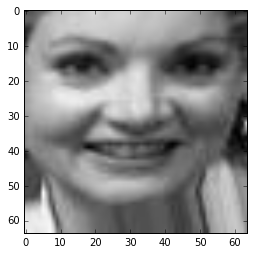

In [2]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt


img = mpimg.imread('/Users/mpourho/Documents/CSU/Courses/CS5661/Datasets/Face2(OlivettiFaces)/2.jpg')
print(img)

imgplot = plt.imshow(img,cmap=plt.cm.gray)
plt.show()

In [3]:
%matplotlib inline

n_features = 4096   # 64x64 image

# Feature Table:
X = pd.DataFrame(columns = ['F'+ str(j) for j in range(n_features)])

for i in range(400):
    file_name = str(i) + '.jpg'
    file_path = '/Users/mpourho/Documents/CSU/Courses/CS5661/Datasets/Face2(OlivettiFaces)/'
    img = mpimg.imread(file_path + file_name)
    #print(img,'\n')
    #imgplot = plt.imshow(img,cmap=plt.cm.gray_r, interpolation='nearest')
    #plt.show()
    
    img_vector = img.reshape((1,n_features))
    #print(img_vector[0],'\n')
    
    X.loc[i,:] = img_vector[0]

print(X.shape)

label = pd.read_csv(file_path + 'label.csv')
y = label['Label']
print(y.head())  
print(X.head())

(400, 4096)
0    13
1    30
2    34
3    19
4    24
Name: Label, dtype: int64
      F0     F1     F2     F3     F4     F5     F6     F7     F8     F9  \
0  186.0  183.0  179.0  190.0  212.0  219.0  221.0  232.0  230.0  231.0   
1  204.0  198.0  194.0  195.0  198.0  195.0  190.0  186.0  190.0  193.0   
2   86.0   79.0   82.0   95.0  100.0  102.0  121.0  146.0  169.0  179.0   
3   61.0   90.0   98.0  119.0  144.0  156.0  174.0  177.0  183.0  195.0   
4   99.0  134.0  165.0  183.0  201.0  210.0  215.0  224.0  232.0  236.0   

   ...    F4086  F4087  F4088  F4089  F4090  F4091  F4092  F4093  F4094  F4095  
0  ...     56.0   45.0   47.0   18.0    0.0    8.0   15.0    9.0    3.0    5.0  
1  ...     19.0    0.0   29.0   52.0   90.0  146.0  130.0  120.0  164.0  167.0  
2  ...    160.0  167.0  179.0  169.0  192.0  188.0  197.0  189.0  185.0  141.0  
3  ...    119.0  244.0  246.0  168.0  126.0  187.0  162.0  145.0   58.0   18.0  
4  ...     83.0   90.0   94.0   90.0   70.0   41.0   71.0  103.0  

In [4]:
X_normalized = preprocessing.scale(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.25, random_state=5)

In [14]:
n_components = 50

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))

my_pca = PCA(n_components=n_components).fit(X_train)

#eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")

X_train_pca = my_pca.transform(X_train)
X_test_pca = my_pca.transform(X_test)

print(X_train.shape)
print(X_train_pca.shape)
print(X_test.shape)
print(X_test_pca.shape)
print(X_train_pca)

Extracting the top 50 eigenfaces from 300 faces
Projecting the input data on the eigenfaces orthonormal basis
(300, 4096)
(300, 50)
(100, 4096)
(100, 50)
[[ -4.78099427e+01  -6.74040129e+00  -7.05903156e+00 ...,   9.27109657e-02
   -1.76102980e+00   3.54052333e-01]
 [ -2.33055615e+01  -8.88553409e+00  -8.40188697e+00 ...,  -1.14527871e+00
    3.67227407e+00   4.15170335e+00]
 [  2.63142194e+01   4.81951488e+00   6.81237879e+00 ...,   2.43229400e+00
   -5.52738055e-01   3.15918210e+00]
 ..., 
 [  1.81094519e+01   9.93641896e+00  -3.08744421e+00 ...,   3.89608729e+00
    7.92333613e-01  -1.75579421e+00]
 [ -3.34563830e+00  -6.65569666e+01   2.68733775e+01 ...,   2.90787018e-02
    6.13232116e-01  -4.45840702e+00]
 [  2.26525266e+00   1.65889568e+01   5.74178171e+00 ...,   5.89896409e+00
    1.16491092e+00   1.98384048e+00]]


In [27]:
my_SVM = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)

# Training ONLY on the training set:
my_SVM.fit(X_train_pca, y_train)

# Testing on the testing set:
y_predict = my_SVM.predict(X_test_pca)
print(y_predict)
#print(y_test)

score = accuracy_score(y_test, y_predict)
print(score)

[16 32 39 22 29 38 21 12 23 28  9 13 29 21 10  1 36 11 39 25  8 26 19 12 35
  7 21 20  8 14  7 33 23  0 20  1 38 25  8 23 39  2 10 13 38 25 26 18  4 36
 26 17 13 16 38 36  4 36  5  6 14  9 13  7  9 22  6  6 24  0  4 31 31 37 14
 22 16 34 11 15 15  0  2 25  5 34 11 18 22 11 12  1 16 24 36 33 32 13 38 20]
0.91


In [28]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_predict)

print("Confusion matrix:")
print(cm)

Confusion matrix:
[[3 0 0 ..., 0 0 0]
 [0 3 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 1]]


In [ ]:
# show the missclassified samples:
print(y_test.head(),'\n')

print(y_predict_ann,'\n')

print(y_test.values,'\n')


[218, 191, 117, 50, 348, 282, 195, 327, 123, 363, 308, 161, 52, 185, 176, 139, 230, 333, 88, 351, 331, 372, 393, 357, 392, 43, 115, 300, 279, 66, 252, 150, 201, 62, 244, 75, 380, 337, 326, 49, 302, 47, 253, 257, 90, 242, 71, 141, 313, 307, 21, 53, 155, 170, 122, 99, 222, 329, 283, 311, 317, 306, 0, 60, 330, 292, 101, 132, 370, 299, 298, 259, 55, 397, 318, 184, 140, 107, 241, 48, 249, 42, 297, 127, 56, 272, 149, 319, 263, 12, 335, 262, 237, 353, 76, 368, 89, 182, 219, 18]


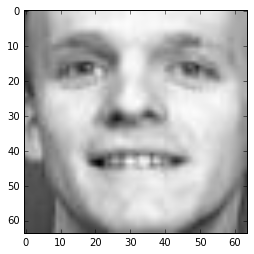

117.jpg
Prediction:  39
Actual:  4 



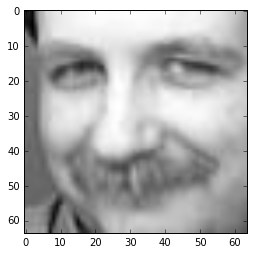

50.jpg
Prediction:  22
Actual:  24 



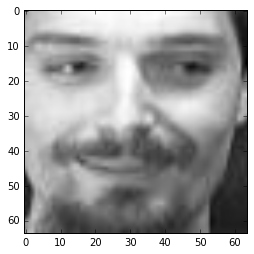

351.jpg
Prediction:  25
Actual:  16 



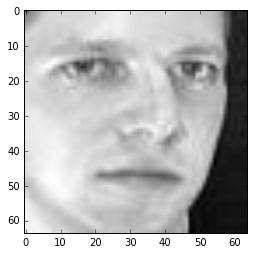

43.jpg
Prediction:  7
Actual:  0 



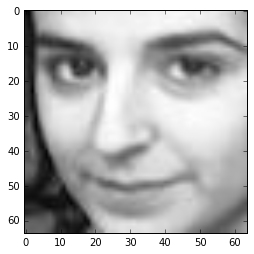

302.jpg
Prediction:  39
Actual:  9 



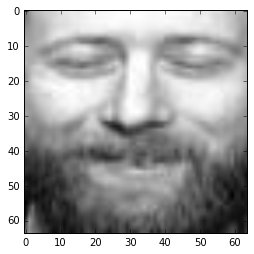

47.jpg
Prediction:  2
Actual:  25 



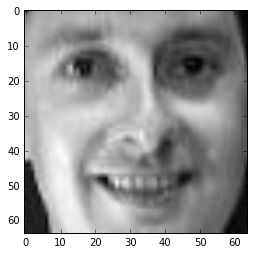

122.jpg
Prediction:  38
Actual:  23 



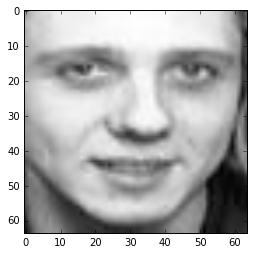

397.jpg
Prediction:  37
Actual:  11 



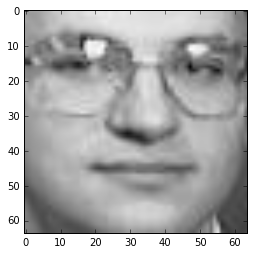

335.jpg
Prediction:  12
Actual:  5 



In [34]:
# show the missclassified samples:

testing_set_index_list = list(y_test.index) # list of the indexes of the samples selected as testing
print(testing_set_index_list)

y_test_list = y_test.values

for i in range(len(testing_set_index_list)):
    
    if (y_predict[i] != y_test_list[i]):
        
        file_name = str(testing_set_index_list[i]) + '.jpg'
        file_path = '/Users/mpourho/Documents/CSU/Courses/CS5661/Datasets/Face2(OlivettiFaces)/'
        img = mpimg.imread(file_path + file_name)
        imgplot = plt.imshow(img,cmap=plt.cm.gray)
        plt.show()
        
        print(file_name)
        print('Prediction: ',y_predict[i])
        print('Actual: ',y_test_list[i],'\n')
        

In [40]:
from sklearn.model_selection import GridSearchCV

# create a dictionary for grid parameter:
param_grid = {'C': [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]}
print(param_grid,'\n')

# instantiate the model:
my_SVM = SVC(kernel='rbf', gamma=0.0005, random_state=1)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_SVM, param_grid, cv=10, scoring='accuracy', n_jobs=8)

# fit the grid (start the grid search):
grid.fit(X_normalized, y)

# view the results:
# print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)

{'C': [0.1, 1, 10, 100, 1000.0, 5000.0, 10000.0, 50000.0, 100000.0]} 

0.965
{'C': 10}
